In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Backward Euler Method:

$\begin{align}
   y_{k+1}=y_k+hf(t_{k+1},y_{k+1}) 
\end{align}$

Consider the initial value problem:

$x''+26x'+25x=50cos(5t), x(0) = 10 , x'(0)=0$

with exact solution:

$x(t) = \frac{1075}{104}e^{-t}- \frac{35}{104}e^{-25t}+\frac{5}{13}sin(5t)$

To apply our numerical methods we convert to the first order system initial value problem:

$y' = \begin{bmatrix} 0 & 1 \\ -25 & -26\end{bmatrix}y + \begin{bmatrix} 0\\50cos(5t)\end{bmatrix}, y(0)=\begin{bmatrix}10\\ {0} \end{bmatrix}$



In [2]:
def backward_euler_system_v2(h,n,t0,y0,A,b):
    Y = np.zeros((len(y0),n+1))
    tk=t0
    Y[:,0]= y0
    I = np.identity(len(y0))
    for k in range(0,n):
        Y[:,k+1] = np.linalg.inv(I-h*A) @ (Y[:,k] + h*b(tk+h))
        tk += h 
    return Y

def f(t,y):
    A = np.array([[0,1],[-25,-26]])
    b = np.array([0,50*np.cos(5*t)])
    return A @ y + b

def exact(t):
    return (1075/104)*np.exp(-t) - (35/104)*np.exp(-25*t) + (5/13)*np.sin(5*t) 

def b(x):
    return np.array([0,50*np.cos(5*x)])

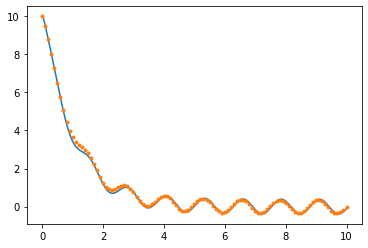

In [5]:
A = np.array([[0,1],[-25,-26]])
t_n = 10
h = .1
t_exact = np.linspace(t_0,t_n,1000)
x_exact = exact(t_exact)
plt.plot(t_exact,x_exact)
y0 = np.array([10,0])
n = int(t_n/h)
t_approx = np.array(range(0,n+1))*h
Y = backward_euler_system_v2(h,n,t_0,y0,A,b)
plt.plot(t_approx,Y[0],'.')

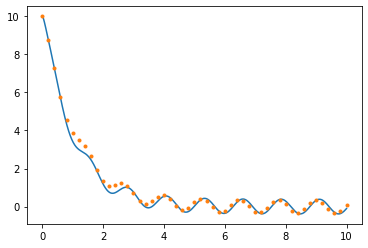

In [6]:
A = np.array([[0,1],[-25,-26]])
t_0 = 0
t_n = 10
h = .2
t_exact = np.linspace(t_0,t_n,1000)
x_exact = exact(t_exact)
plt.plot(t_exact,x_exact)
y0 = np.array([10,0])
n = int(t_n/h)
t_approx = np.array(range(0,n+1))*h
Y = backward_euler_system_v2(h,n,t_0,y0,A,b)
plt.plot(t_approx,Y[0],'.')